## 1. import tensorflow & keras

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop

Using TensorFlow backend.


## 2. MNISTデータを読込む

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 3. MNISTデータを加工する

In [3]:
# MNISTデータを加工する
x_train  = x_train.reshape(60000, 784)
x_test   = x_test.reshape(10000, 784)
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255
y_train  = keras.utils.to_categorical(y_train, 10)
y_test   = keras.utils.to_categorical(y_test, 10)

## 4. モデルの構築

In [39]:
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## 5. 学習

In [40]:
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.5977 - accuracy: 0.8506 - val_loss: 0.3405 - val_accuracy: 0.9086
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.3299 - accuracy: 0.9087 - val_loss: 0.2996 - val_accuracy: 0.9159
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.3009 - accuracy: 0.9159 - val_loss: 0.2845 - val_accuracy: 0.9214
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2878 - accuracy: 0.9199 - val_loss: 0.2797 - val_accuracy: 0.9233
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2801 - accuracy: 0.9219 - val_loss: 0.2736 - val_accuracy: 0.9230
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2745 - accuracy: 0.9236 - val_loss: 0.2747 - val_accuracy: 0.9243
Epoch 7/10
60000/60000 [==============================] - 1s 16us/st

## 6. 評価

In [41]:
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 24us/step

Test loss: 0.2686442223727703
Test accuracy: 0.9258999824523926


## 7. 可視化

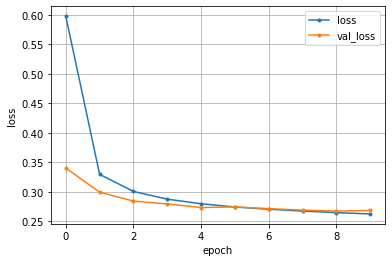

In [42]:
import matplotlib.pyplot as plt

loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()